In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
ps_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).order_by(Measurement.date)

# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(ps_query, columns=['Date', 'Precipitation'])
df_precipitation.set_index('Date', inplace = True)
df_precipitation

,Precipitation
Date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


In [12]:
# Sort the dataframe by date
df_precipitation.sort_index(inplace = True)
df_precipitation

,Precipitation
Date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


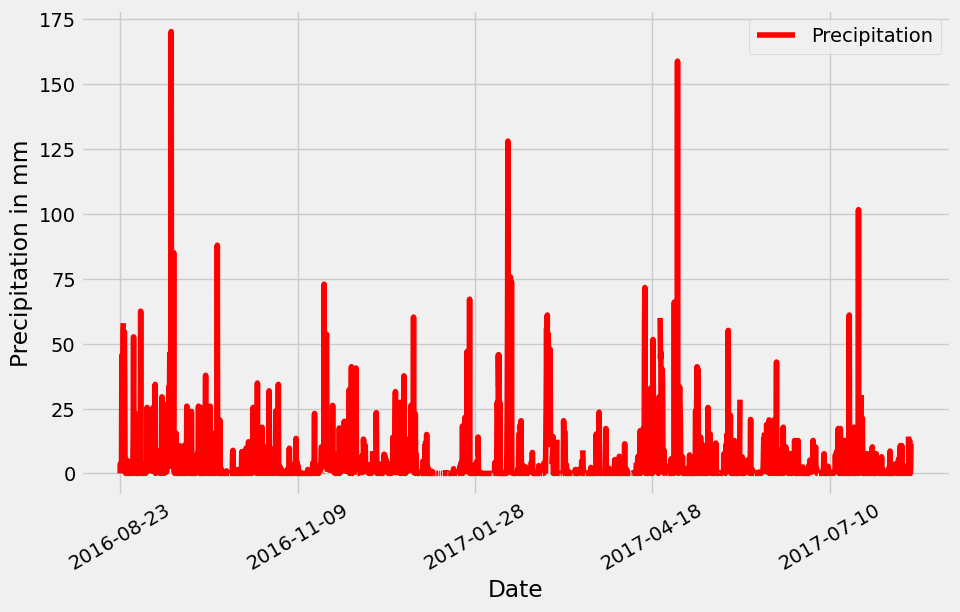

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot(figsize=(10, 6), color='r')
plt.xlabel('Date')
plt.ylabel('Precipitation in mm')
plt.xticks(rotation=30)
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precipitation.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(func.count(Station.station)).scalar()
number_of_stations

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations_descending = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations_descending

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations_descending[0][0]

lowest_temp = session.query(func.min(Measurement.tobs).filter(Measurement.station == most_active_station_id)).scalar()
print('lowest temperature:', lowest_temp)
highest_temp = session.query(func.max(Measurement.tobs).filter(Measurement.station == most_active_station_id)).scalar()
print('highest temperature:', highest_temp)
average_temp = session.query(func.avg(Measurement.tobs).filter(Measurement.station == most_active_station_id)).scalar()
print('average temperature:', f'{average_temp:.2f}')

lowest temperature: 12.2
highest temperature: 29.4
average temperature: 22.04


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data_12_months = session.query(Measurement.tobs)\
                    .filter(Measurement.station == most_active_station_id)\
                    .filter(Measurement.date >= last_year).all()
# temp_data_12_months

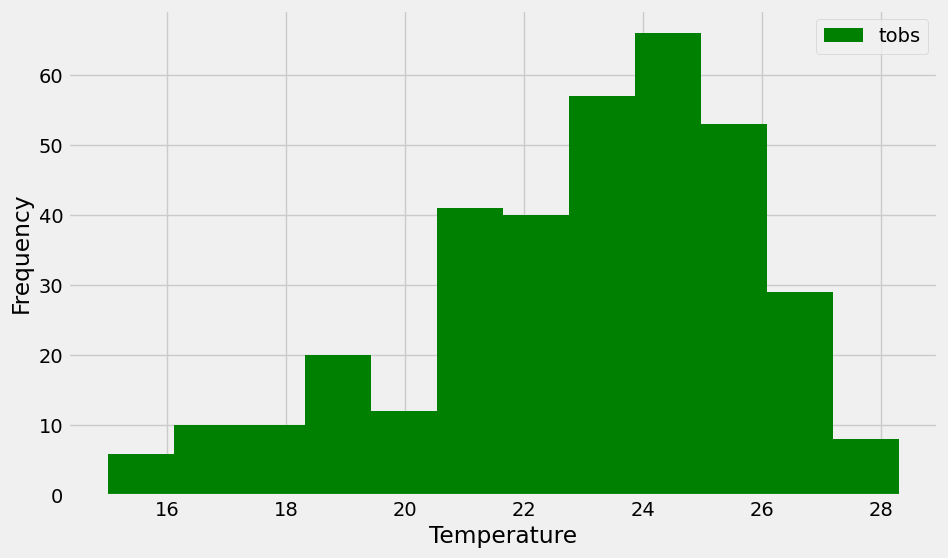

In [19]:
# plot the results as a histogram
temp_data_most_active_station = [temp[0] for temp in temp_data_12_months]
plt.figure(figsize=(10,6))
plt.hist(temp_data_most_active_station, bins=12, label = "tobs", color='g')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close session

In [20]:
# Close Session
session.close()